In [139]:
import nbsetup
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau, chisquare
from helpers.ergodic import ErgodicEnsemble

In [164]:
def cont_to_disc(X, Y, ensemble_bins):
    if len(X) != len(Y):
        raise IndexError("Length of X & Y must match %s != %s" % (len(X), len(Y)))
    bins = np.linspace(X.min(), X.max(), ensemble_bins+1)
    obs = dict([(str(b), []) for b in bins[:-1]])
    for xi, x in enumerate(X):
        for bi, b in enumerate(bins):
            if x >= b and x <= bins[bi+1]:
                try:
                    obs[str(b)].append(Y[xi])
                    break
                except KeyError:
                    raise KeyError("Try reset_index on the filtered pandas dataframe")
    return obs

def create_df(X, Y, y_bins):
    metrics = []
    total = len(X)
    
    # picking how many ensembles to break the data into
    if total > 200:
        rng = range(int(total/200), int(total/20))
    # if it's too few then manually pick
    else:
        rng = range(5, 12)
    
    # then generate for each of the ensemble groups
    for x_bins in rng:
        obs = cont_to_disc(X, Y, x_bins)
        bins = np.linspace(Y.min(), Y.max(), y_bins+1)
        ee = ErgodicEnsemble(obs, bins)
        metrics.append({
            "|Pearson|": np.abs(pearsonr(X, Y)[0]),
            "|Spearman|": np.abs(spearmanr(X, Y)[0]),
            "|Kendall|": np.abs(kendalltau(X, Y)[0]),
            "Simple complexity": ee.complexity,
            "Sigmoid complexity": ee.sigmoid,
            "Alt": ee.complexity/(ee.ensemble_count**0.25),
            "#Ensembles": x_bins,
        })
    return pd.DataFrame(metrics)    

def create_ee(X, Y):
    fig, axes = plt.subplots(1, 4, sharex=False, sharey=True, figsize=(15,5))
    
    # scatter plot with raw data to visualise
    sns.scatterplot(x=X, y=Y, ax=axes[0])
    
    total = len(X)
    # when picking testing three ranges of bin choices
    if total > 200:
        rng = [int(total/200),int(total/100),int(total/20)]
    # if it's too few then manually pick
    else:
        rng = [5,8,12]
    
    # plot each of the line plots
    for i, y_bin in enumerate(rng):
        if y_bin > 1:
            df = create_df(X, Y, y_bin)
            g = sns.lineplot(data=df.melt(id_vars=['#Ensembles']), x='#Ensembles', y='value', hue='variable', palette='icefire', ax=axes[i+1])
            g.set_title("#bins %s (%s o/bin)" % (y_bin, int(total/y_bin)))
    return
    

In [165]:
OBSERVATIONS = 1000
X = np.random.random(OBSERVATIONS)

<AxesSubplot:>

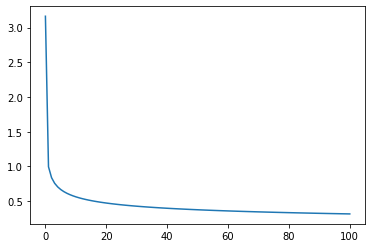

In [166]:
a = np.linspace(0.01,100,100)
b = 1/(a**0.25)
#c = np.log(a)
sns.lineplot(x=a, y=b)
#sns.lineplot(x=a, y=c)

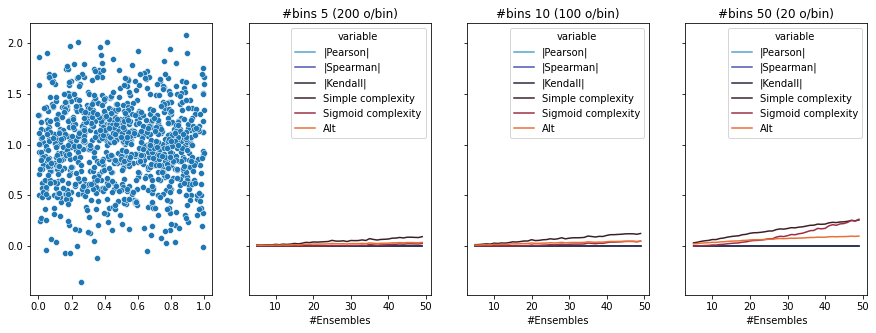

In [167]:
y = np.ones(OBSERVATIONS)+np.random.normal(0, 0.4, OBSERVATIONS)
df = create_ee(X, y)

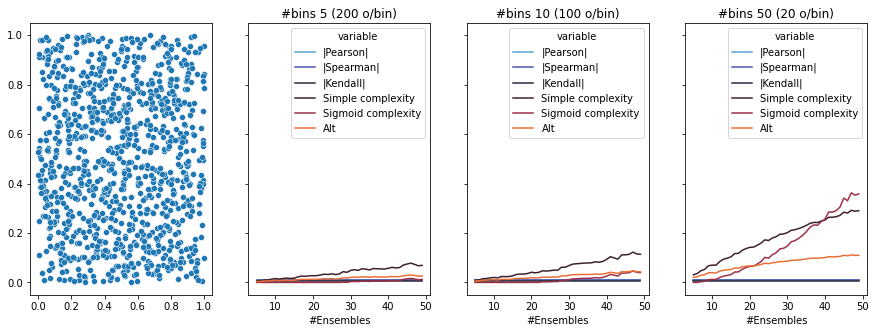

In [168]:
x = create_ee(X, np.random.random(OBSERVATIONS))

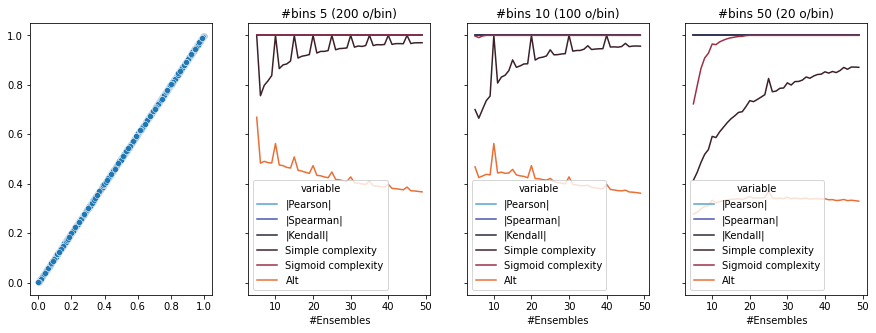

In [169]:
x = create_ee(X, X)

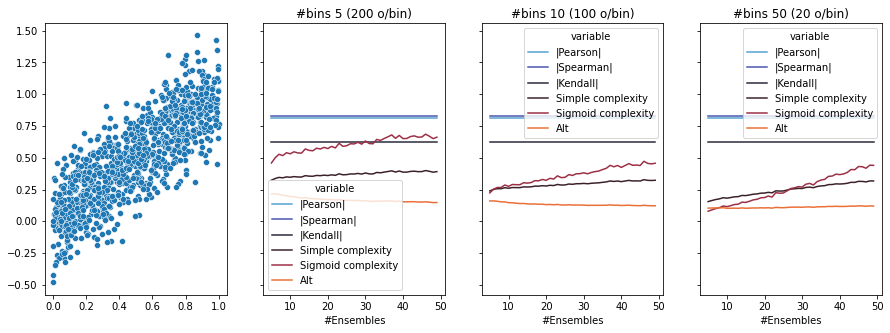

In [170]:
create_ee(X, X+np.random.normal(0, 0.2, OBSERVATIONS))

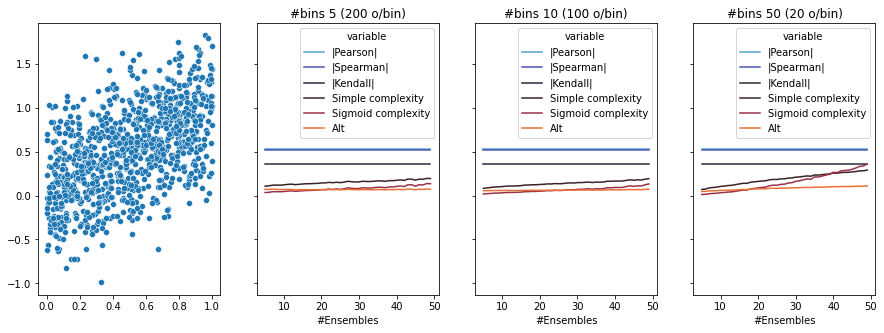

In [171]:
create_ee(X, X+np.random.normal(0, 0.4, OBSERVATIONS))

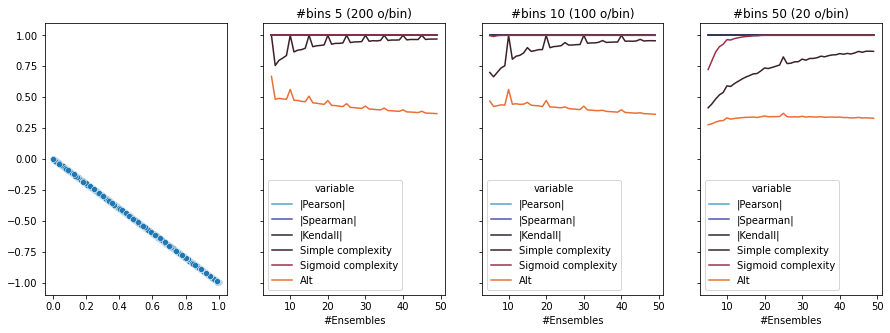

In [172]:
create_ee(X, -X)

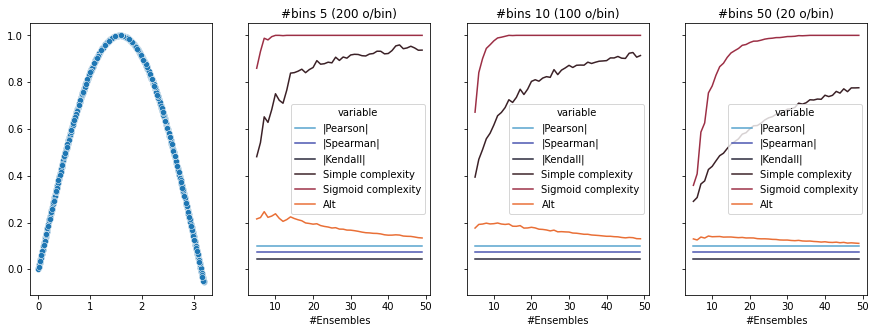

In [149]:
x = np.random.random(OBSERVATIONS)*3.2
create_ee(x, np.sin(x))

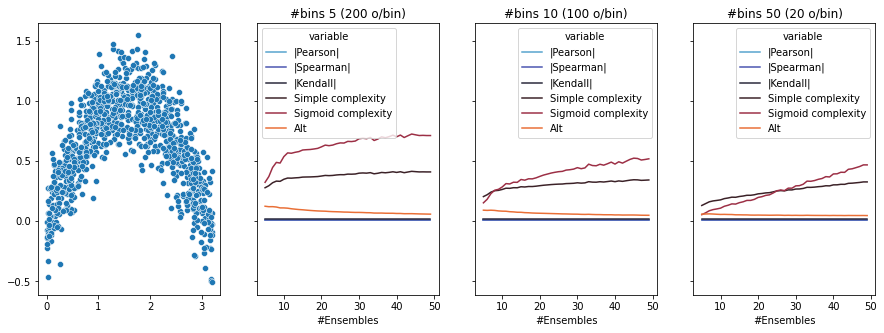

In [150]:
x = np.random.random(OBSERVATIONS)*3.2
ee = create_ee(x, np.sin(x)+np.random.normal(0,0.2,OBSERVATIONS))

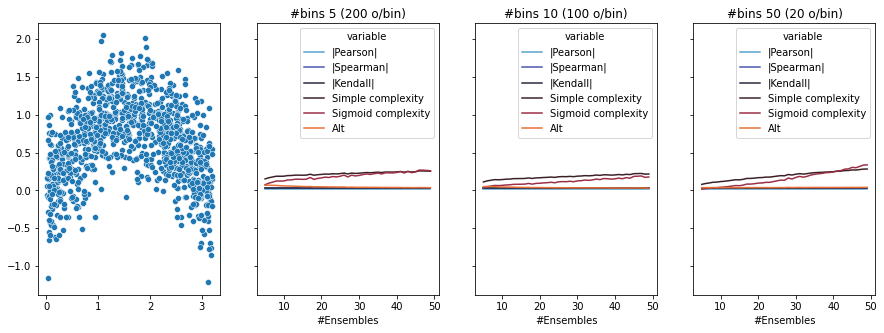

In [151]:
x = np.random.random(OBSERVATIONS)*3.2
ee = create_ee(x, np.sin(x)+np.random.normal(0,0.4,OBSERVATIONS))

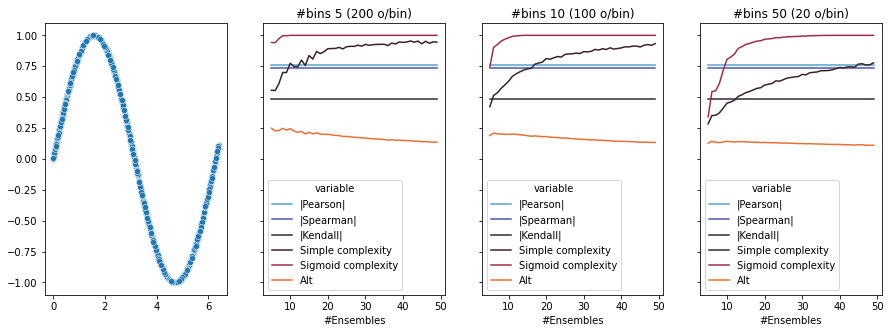

In [152]:
x = np.random.random(OBSERVATIONS)*6.4
create_ee(x, np.sin(x))

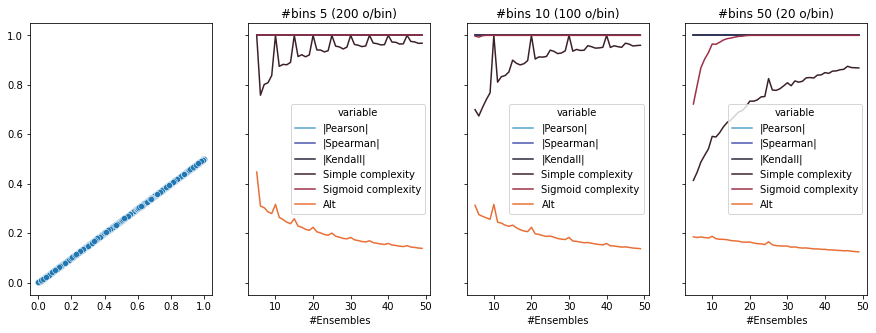

In [153]:
x = np.random.random(OBSERVATIONS)
ee = create_ee(x, x/2)

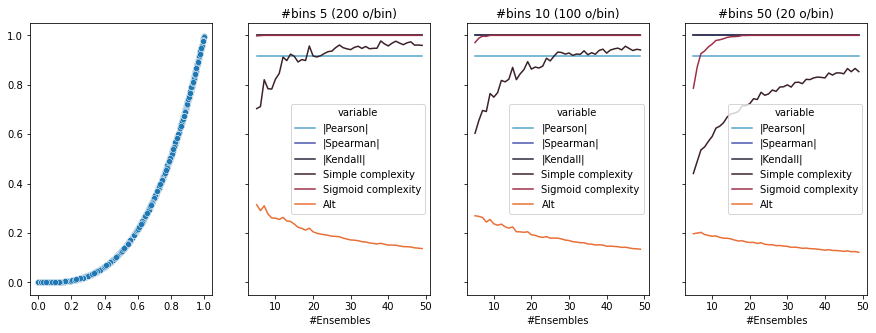

In [154]:
ee = create_ee(x, x**3)

In [155]:
# https://raw.githubusercontent.com/perlatex/R_for_Data_Science/master/demo_data/datasaurus.csv
funky = pd.read_csv("../datasets/datasaurus.csv")

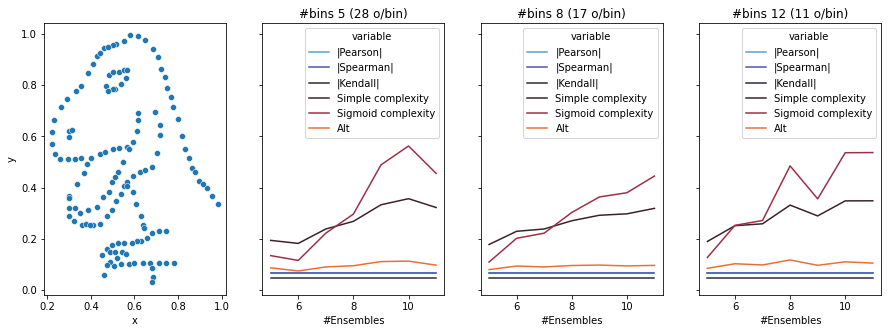

In [156]:
df = funky.loc[funky.dataset == 'dino']
create_ee(df['x']*0.01, df['y']*0.01)

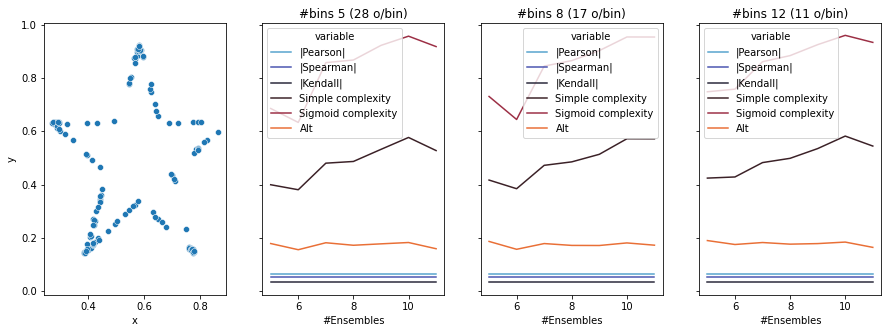

In [157]:
df = funky.loc[funky.dataset == 'star'].reset_index()
create_ee(df['x']*0.01, df['y']*0.01)

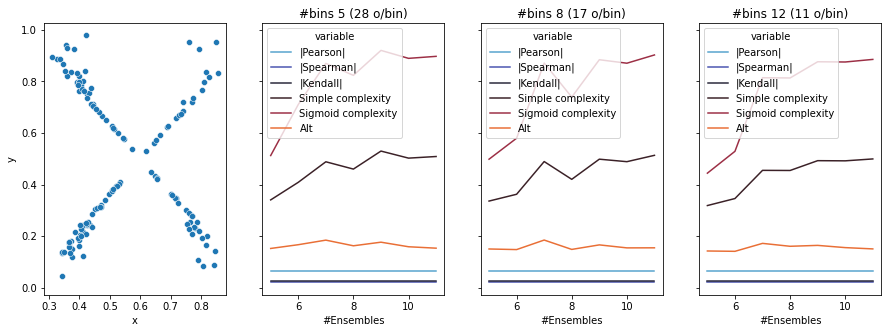

In [158]:
df = funky.loc[funky.dataset == 'x_shape'].reset_index()
create_ee(df['x']*0.01, df['y']*0.01)

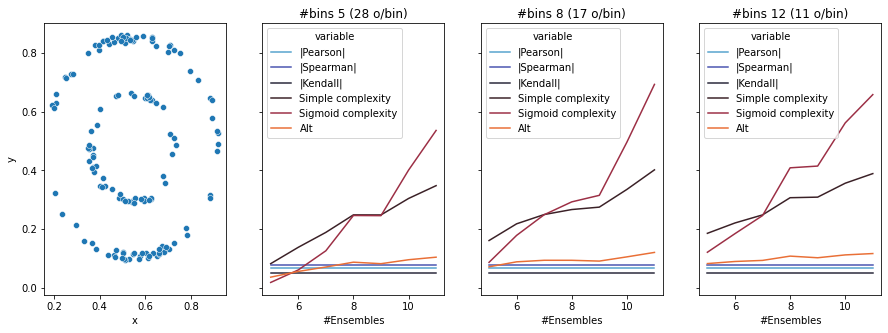

In [159]:
df = funky.loc[funky.dataset == 'bullseye'].reset_index()
create_ee(df['x']*0.01, df['y']*0.01)

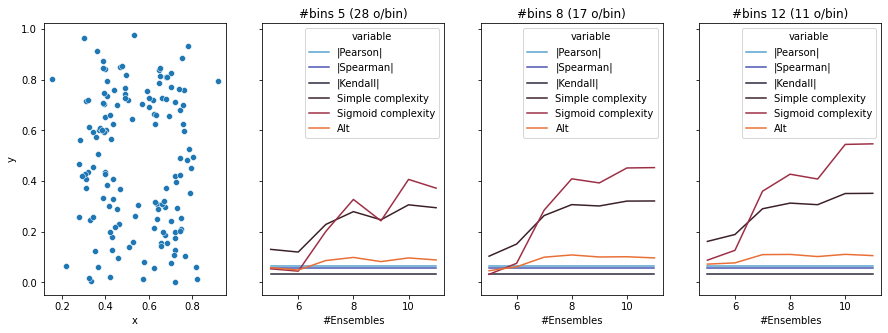

In [160]:
df = funky.loc[funky.dataset == 'away'].reset_index()
create_ee(df['x']*0.01, df['y']*0.01)

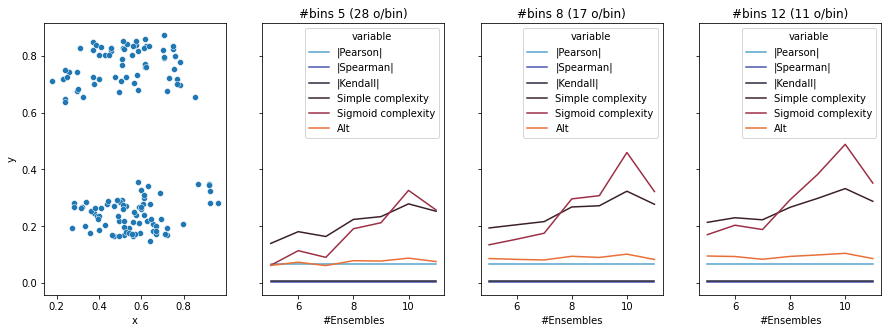

In [161]:
df = funky.loc[funky.dataset == 'high_lines'].reset_index()
create_ee(df['x']*0.01, df['y']*0.01)

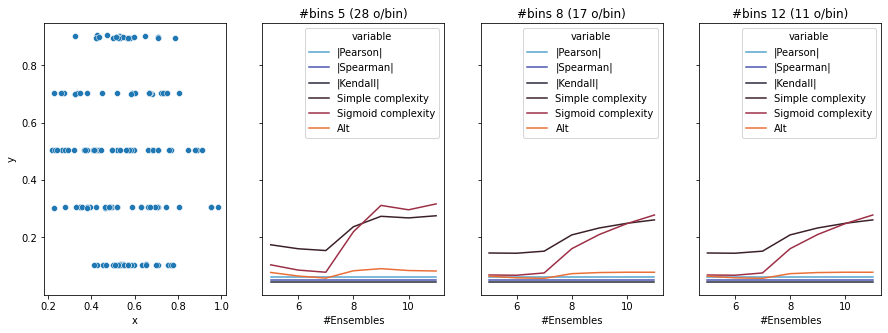

In [162]:
df = funky.loc[funky.dataset == 'h_lines'].reset_index()
create_ee(df['x']*0.01, df['y']*0.01)

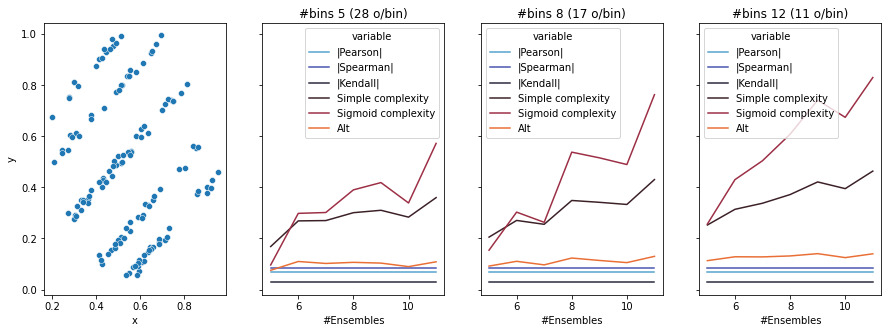

In [163]:
df = funky.loc[funky.dataset == 'slant_up'].reset_index()
create_ee(df['x']*0.01, df['y']*0.01)